In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('./archive-2/train.csv')
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [10]:
X = df.drop(columns='TARGET(PRICE_IN_LACS)')
y = df['TARGET(PRICE_IN_LACS)']

/var/folders/6r/3zbb7bfn2xl2h3h0gkgglcjr0000gn/T/ipykernel_18282/3199420554.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TARGET(PRICE_IN_LACS)'])


<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

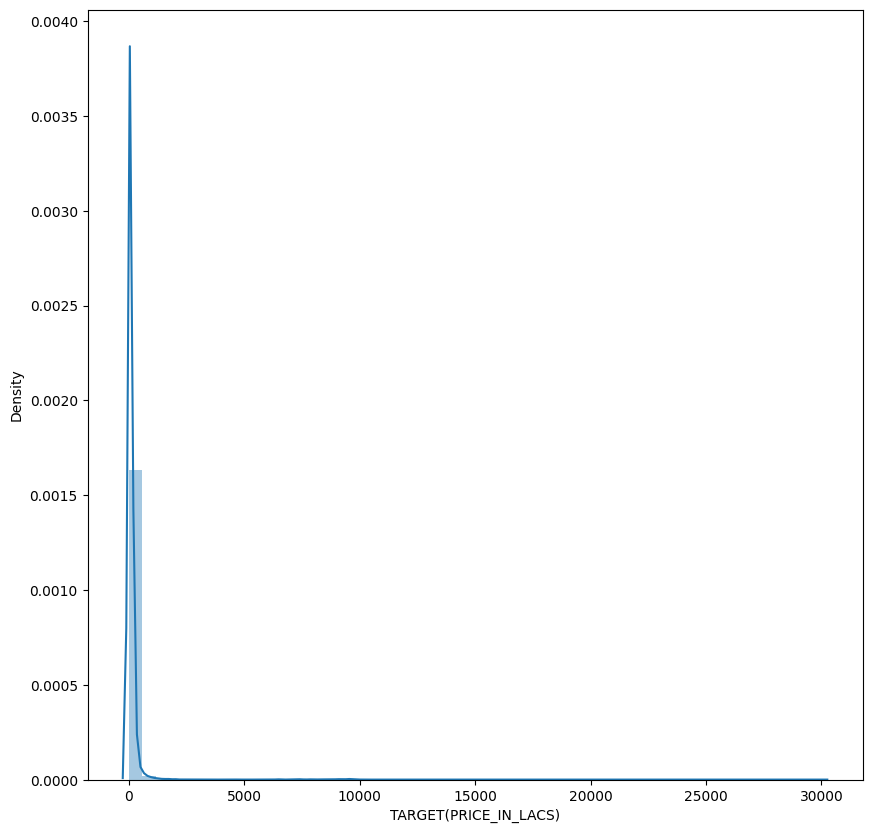

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

plt.figure(figsize = (10,10))
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

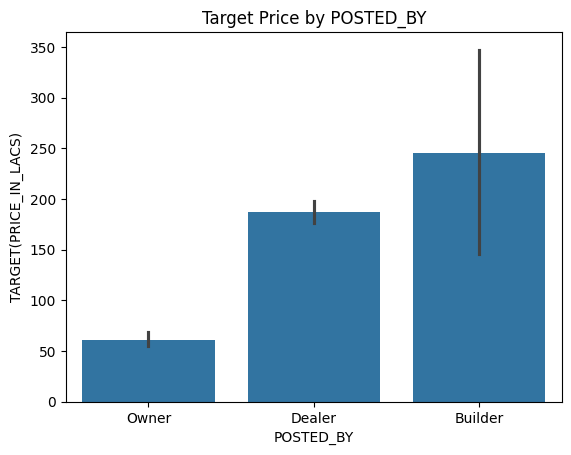

In [12]:
sns.barplot(x='POSTED_BY', y='TARGET(PRICE_IN_LACS)', data=df)
plt.title('Target Price by POSTED_BY')
plt.show()

In [13]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

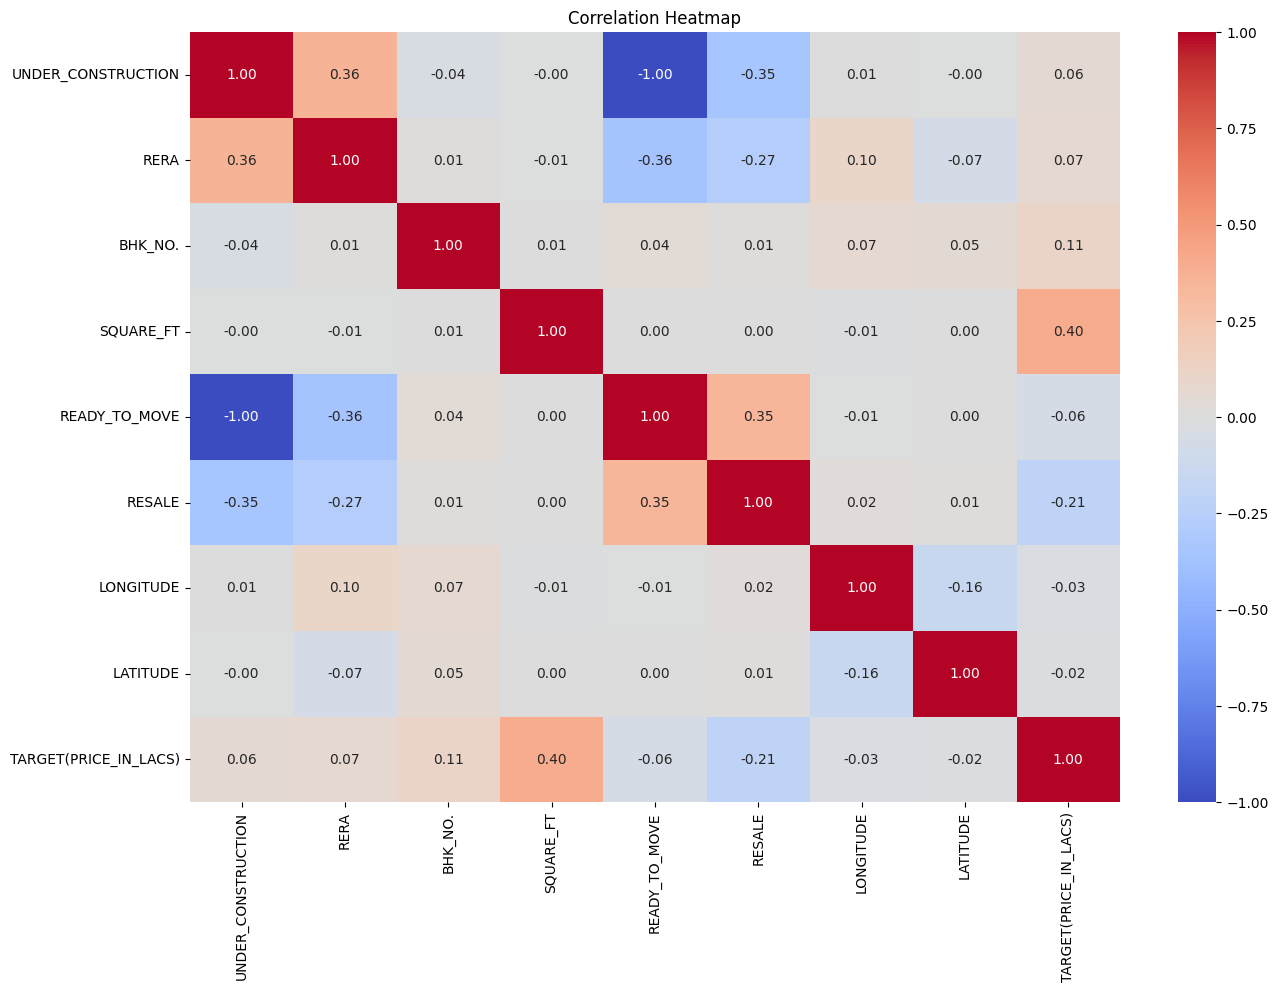

In [14]:
num_useful = df[['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
                 'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']]

corr_matrix = num_useful.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64


<BarContainer object of 2 artists>

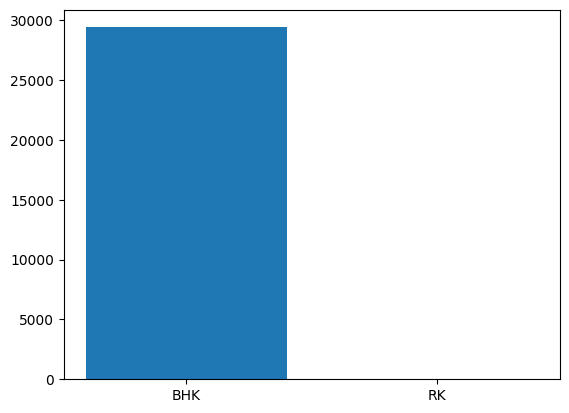

In [15]:
print(df["BHK_OR_RK"].value_counts())
plt.bar(["BHK","RK"],df["BHK_OR_RK"].value_counts())

In [16]:
df.drop(['BHK_OR_RK'], axis=1, inplace=True)
df['CITY'] = df['ADDRESS'].str.split(',').str.get(1)
df['CITY'].value_counts()

CITY
Bangalore               4319
Lalitpur                2987
Mumbai                  2020
Pune                    1984
Noida                   1765
                        ... 
 ELECTRICITY COLONY        1
Chhindwara                 1
Jivarajpark                1
opp To Nagarjuna Sch       1
 Lake View Recidency       1
Name: count, Length: 433, dtype: int64

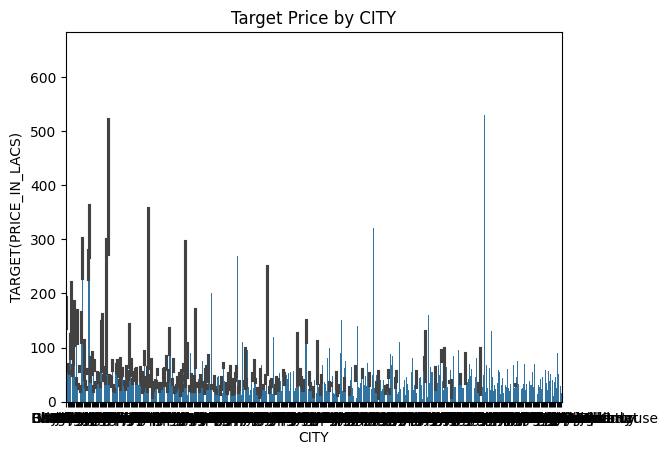

In [17]:
sns.barplot(x='CITY', y='TARGET(PRICE_IN_LACS)', data=df)
plt.title('Target Price by CITY')
plt.show()

In [18]:
X = pd.get_dummies(X, dtype=float, drop_first=True)
X

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,...,"ADDRESS_vasundhara nagar,Jalna","ADDRESS_veeraragavalu Nagar, Vinayagapuram, Kathirvedu Village, Ambattur Taluk,Chennai","ADDRESS_vidyut nagar,Rajkot","ADDRESS_vikas nagar,Karnal","ADDRESS_vinayaka,Varanasi","ADDRESS_virar,Palghar","ADDRESS_vishakoderu,Bhimavaram","ADDRESS_walkeshwari nagari,Jamnagar","ADDRESS_west mambalam,Chennai","ADDRESS_yelahanka/Jakkur,Bangalore"
0,0,0,2,1300.236407,1,1,12.969910,77.597960,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,2,999.009247,0,1,22.592200,88.484911,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
reg = DecisionTreeRegressor(max_depth = 5)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [20]:
reg.score(X_test, y_test)

0.9210571894033253

In [21]:
res = reg.score(X_train, y_train)
res

0.9491565729989369